## 4. pytorch构建分类器

一个更完整的例子——使用cnn做图片分类：

- 处理数据
- 定义卷积神经网络
- 定义损失函数
- 在训练集上训练模型
- 在测试集上测试模型

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

## 1. 处理数据

In [2]:
# 数据转换器
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,download=True, transform=transform)
# 数据迭代器
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [3]:
import os
print(os.getcwd())

/home/yangcaihua/task/pytorch


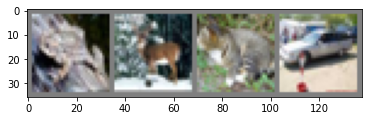

 frog  deer   cat   car


In [4]:
# 导入画图包和numpy
import matplotlib.pyplot as plt
import numpy as np

# 构建展示图片的函数
def imshow(img):
    img = img / 2 + 0.5 #归一化
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# 从数据迭代器中读取一张图片
dataiter = iter(trainloader)
images, labels = dataiter.next()

# 展示图片
imshow(torchvision.utils.make_grid(images))
# 打印标签label
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

## 2. 构建模型

In [5]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()
print(net)


Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


## 3. 定义损失函数


In [6]:
import torch.optim as optim
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(),lr=0.001,momentum=0.9)

## 4. 在训练集上训练模型


In [8]:
# 训练模型
for epoch in range(2):
    running_loss = 0
    for i,data in enumerate(trainloader,0):
        inputs,labels = data
        optimizer.zero_grad()
        outputs = net.forward(inputs)
        loss = criterion(outputs,labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if (i+1) % 2000 == 0:
            print('[%d,%5d] loss: %.3f' %(epoch+1,i+1,running_loss/2000))
            running_loss = 0
print('finish')
# 首先设定模型的保存路径
PATH = './cifar_net.pth'
torch.save(net.state_dict(),PATH)


[1, 2000] loss: 1.160
[1, 4000] loss: 1.157
[1, 6000] loss: 1.144
[1, 8000] loss: 1.150
[1,10000] loss: 1.146
[1,12000] loss: 1.139
[2, 2000] loss: 1.059
[2, 4000] loss: 1.078
[2, 6000] loss: 1.061
[2, 8000] loss: 1.077
[2,10000] loss: 1.058
[2,12000] loss: 1.091
finish


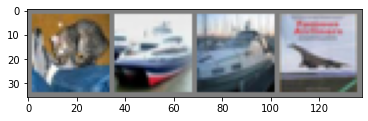

  cat ship shipplane


In [9]:
dataiter = iter(testloader)
images,labels = dataiter.next()
imshow(torchvision.utils.make_grid(images))
print(''.join('%5s' %classes[labels[j]]for j in range(4)))

## 5. 在测试集上测试模型

In [10]:
net = Net()
net.load_state_dict(torch.load(PATH))
outputs = net(images)
# 在第一个维度
print(outputs.size())
_,predicted = torch.max(outputs,1)
print(_)
print(predicted)
print('Predicted: ', ' '.join('%5s' % classes[predicted[j]] for j in range(4)))

torch.Size([4, 10])
tensor([3.4784, 7.8263, 2.2715, 2.8441], grad_fn=<MaxBackward0>)
tensor([3, 1, 1, 0])
Predicted:    cat   car   car plane


In [11]:
a = torch.randn(2,3)
print(a)
print(torch.max(a,1))

tensor([[ 0.6477,  2.3256,  0.2365],
        [ 0.1188, -2.2238, -1.2357]])
torch.return_types.max(
values=tensor([2.3256, 0.1188]),
indices=tensor([1, 0]))


In [12]:
# 测试全部数据集
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images,labels = data
        outputs = net.forward(images)
        _,predicted = torch.max(outputs,1)
        total += labels.size(0) #batchsize
        # print(labels)
        correct += (predicted==labels).sum().item()
print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))       
    
                                

Accuracy of the network on the 10000 test images: 57 %


In [13]:
a = torch.tensor([1, 1, 9, 7])
print(a.size())

torch.Size([4])


In [14]:
# 十个类别
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    print(len(testloader))
    for i,data in enumerate(testloader):
        # print(i)
        images, labels = data
        # print(labels)
        outputs = net.forward(images)
        _, predicted = torch.max(outputs, 1)
        # print()
        c = (predicted == labels) #.squeeze() #去除多余维度
        # print(c)
        
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (classes[i], 100 * class_correct[i] / class_total[i]))

2500
Accuracy of plane : 57 %
Accuracy of   car : 72 %
Accuracy of  bird : 43 %
Accuracy of   cat : 62 %
Accuracy of  deer : 60 %
Accuracy of   dog : 24 %
Accuracy of  frog : 69 %
Accuracy of horse : 55 %
Accuracy of  ship : 62 %
Accuracy of truck : 69 %


In [15]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda
